In [10]:
#import library
import numpy as np
import pandas as pd
import random
import seaborn as sns

In [35]:
#nama dataset
train_filename="el4233-2018-2019-02-ann-klasifikasi-train.csv"
test_filename="el4233-2018-2019-02-ann-klasifikasi-test.csv"

In [43]:
#baca data
training = pd.read_csv(train_filename,header=None, names = ["n", "x", "y", "z"])
training.head()

,n,x,y,z
0,0,996.530840,435.395005,0
1,1,107.659135,264.693665,1
2,2,2560.672014,777.498811,0
3,3,4007.434761,1030.492112,1
4,4,2322.885526,2095.766724,1


In [44]:
#drop index
training = training.drop("n", axis = 1)
training.head()

,x,y,z
0,996.530840,435.395005,0
1,107.659135,264.693665,1
2,2560.672014,777.498811,0
3,4007.434761,1030.492112,1
4,2322.885526,2095.766724,1


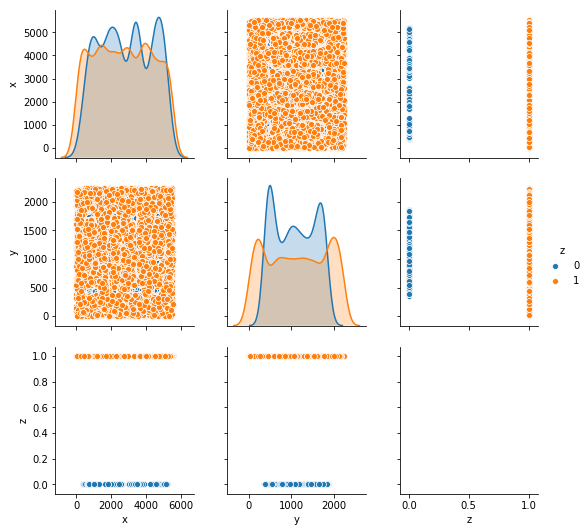

In [46]:
# Plot pasangan
sns.pairplot(training, hue='z')

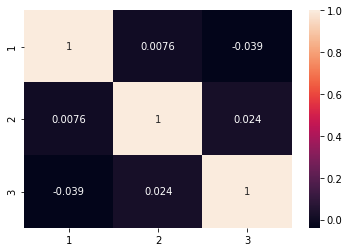

In [39]:
# plot heatmap
sns.heatmap(training.corr(), annot=True)

In [40]:
# bagi x, bagi y
training_X = training.iloc[:,0:2].values
training_z = training.iloc[:,2].values

Text(0, 0.5, 'y')

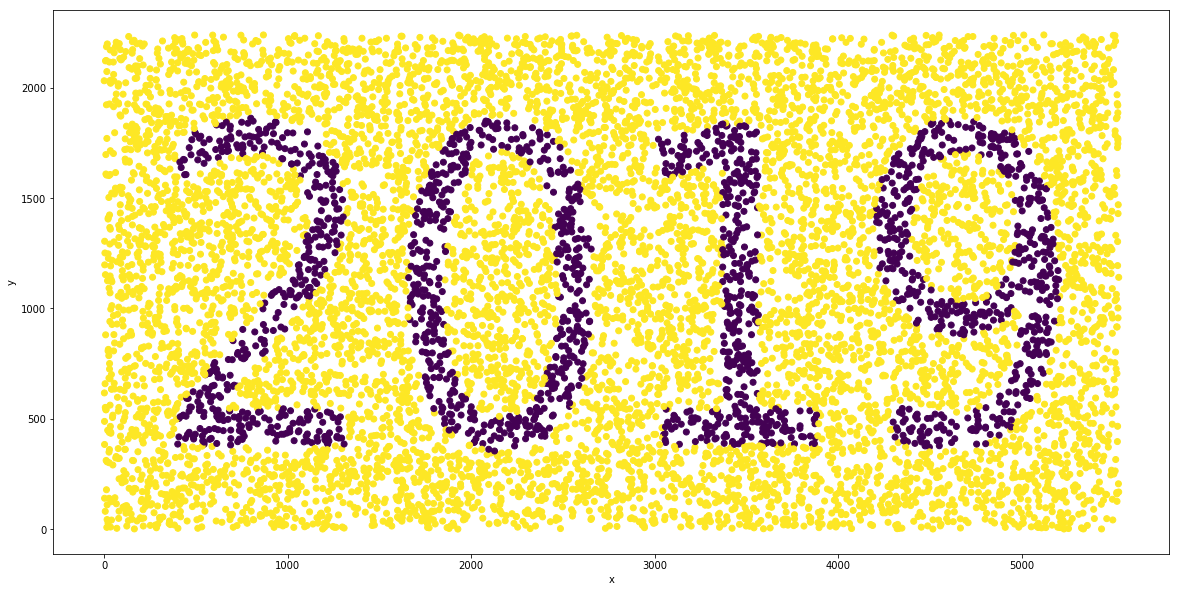

In [47]:
# Plot data
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
plt.scatter(training['x'], training['y'], c=training_z)
plt.xlabel("x")
plt.ylabel("y")

In [48]:
# Scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scale = sc.fit_transform(training_X)
X_scale
# z_scale = sc.fit_transform(X_val)

array([[-1.10550302, -1.04649979],
       [-1.66490212, -1.30816383],
       [-0.12113242, -0.52209696],
       ...,
       [ 0.84802927, -1.04109648],
       [ 0.78158383,  0.39029477],
       [-1.46892904, -0.61851809]])

In [49]:
# split training dan validation
from sklearn.model_selection import train_test_split
X_train,X_val,z_train,z_val=train_test_split(X_scale,training_z,test_size=0.2)

In [51]:
# import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [172]:
#Buat model 
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(50, activation='relu', kernel_initializer='random_normal', input_dim=2))
#Hidden Layer
classifier.add(Dense(50, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(50, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(50, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(50, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(50, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [173]:
#Compiling neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [174]:
#Fit dataset
classifier.fit(X_train,z_train, batch_size=10, epochs=100)

Epoch 1/100
8000/8000 [==============================] - 2s 208us/sample - loss: 0.4623 - acc: 0.8183
Epoch 2/100
8000/8000 [==============================] - 1s 169us/sample - loss: 0.4302 - acc: 0.8183
Epoch 3/100
8000/8000 [==============================] - 1s 138us/sample - loss: 0.3975 - acc: 0.8183
Epoch 4/100
8000/8000 [==============================] - 1s 140us/sample - loss: 0.3817 - acc: 0.8183
Epoch 5/100
8000/8000 [==============================] - 1s 132us/sample - loss: 0.3749 - acc: 0.8183
Epoch 6/100
8000/8000 [==============================] - 1s 138us/sample - loss: 0.3669 - acc: 0.8183
Epoch 7/100
8000/8000 [==============================] - 1s 133us/sample - loss: 0.3587 - acc: 0.8183
Epoch 8/100
8000/8000 [==============================] - 1s 152us/sample - loss: 0.3542 - acc: 0.8171
Epoch 9/100
8000/8000 [==============================] - 1s 182us/sample - loss: 0.3505 - acc: 0.8240
Epoch 10/100
8000/8000 [==============================] - 1s 178us/sample - loss: 

8000/8000 [==============================] - 2s 307us/sample - loss: 0.1279 - acc: 0.9467
Epoch 81/100
8000/8000 [==============================] - 2s 303us/sample - loss: 0.1246 - acc: 0.9490
Epoch 82/100
8000/8000 [==============================] - 2s 302us/sample - loss: 0.1242 - acc: 0.9480
Epoch 83/100
8000/8000 [==============================] - 2s 308us/sample - loss: 0.1221 - acc: 0.9471
Epoch 84/100
8000/8000 [==============================] - 3s 315us/sample - loss: 0.1201 - acc: 0.9488
Epoch 85/100
8000/8000 [==============================] - 2s 196us/sample - loss: 0.1165 - acc: 0.9520
Epoch 86/100
8000/8000 [==============================] - 1s 148us/sample - loss: 0.1212 - acc: 0.9507
Epoch 87/100
8000/8000 [==============================] - 1s 155us/sample - loss: 0.1200 - acc: 0.9484
Epoch 88/100
8000/8000 [==============================] - 1s 138us/sample - loss: 0.1170 - acc: 0.9524
Epoch 89/100
8000/8000 [==============================] - 1s 135us/sample - loss: 0.11

In [175]:
# evaluasi data
eval_model=classifier.evaluate(X_train, z_train)
eval_model

8000/8000 [==============================] - 0s 47us/sample - loss: 0.1161 - acc: 0.9514


[0.11606925925984979, 0.951375]

In [176]:
# predict validation
z_pred=classifier.predict(X_val)
z_pred=(z_pred>0.5)
temp_z = np.array([])

for z in z_pred:
    a = int(z[0])
    temp_z = np.append(temp_z, a)
temp_z

array([1., 1., 0., ..., 1., 1., 1.])

In [177]:
# test confusion metric
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(z_val, z_pred)
print(cm)

[[ 344   47]
 [  62 1547]]


In [178]:
#temporer
temp = pd.DataFrame(X_val)
temp.head()

,0,1
0,0.330871,0.017507
1,1.161388,1.528754
2,0.925440,0.682386
3,-0.600211,-0.907262
4,0.438694,1.105213


Text(0, 0.5, 'y')

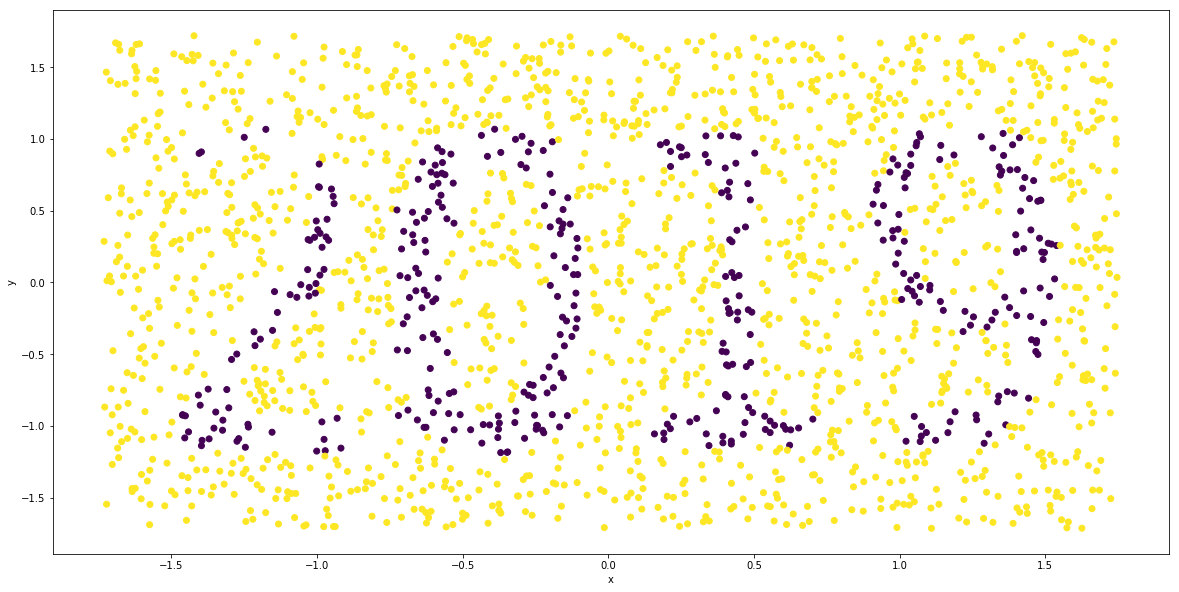

In [179]:
# plot validation
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
plt.scatter(temp[0],temp[1], c=temp_z)
plt.xlabel("x")
plt.ylabel("y")

In [182]:
# import test set
testing = pd.read_csv(test_filename,header=None, names = ["n", "x", "y"])
testing.head()

,n,x,y
0,0,116.719304,1580.905084
1,1,5053.130893,727.388601
2,2,1943.101591,406.083902
3,3,4825.519309,771.889965
4,4,557.798150,2213.179651


In [183]:
# drop index
testing = testing.drop("n", axis = 1)
testing.head()

,x,y
0,116.719304,1580.905084
1,5053.130893,727.388601
2,1943.101591,406.083902
3,4825.519309,771.889965
4,557.798150,2213.179651


In [189]:
# ambil X
testing_X = testing.iloc[:,0:2].values

In [191]:
# scale X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test_scale = sc.fit_transform(testing_X)
X_test_scale

array([[-1.6493891 ,  0.70666721],
       [ 1.44223621, -0.61615898],
       [-0.5055441 , -1.11413444],
       ...,
       [-1.39544171,  0.63246925],
       [ 0.78100587,  1.34304519],
       [-0.93633184, -0.82075213]])

In [197]:
# predict test z
z_test_pred=classifier.predict(X_test_scale)
z_test_pred=(z_test_pred>0.5)
temp_z = np.array([])

for z in z_test_pred:
    a = int(z[0])
    temp_z = np.append(temp_z, a)
temp_z

array([1., 0., 0., ..., 1., 1., 1.])

In [198]:
# temporer
temp = pd.DataFrame(testing_X)
temp.head()

,0,1
0,116.719304,1580.905084
1,5053.130893,727.388601
2,1943.101591,406.083902
3,4825.519309,771.889965
4,557.798150,2213.179651


Text(0, 0.5, 'y')

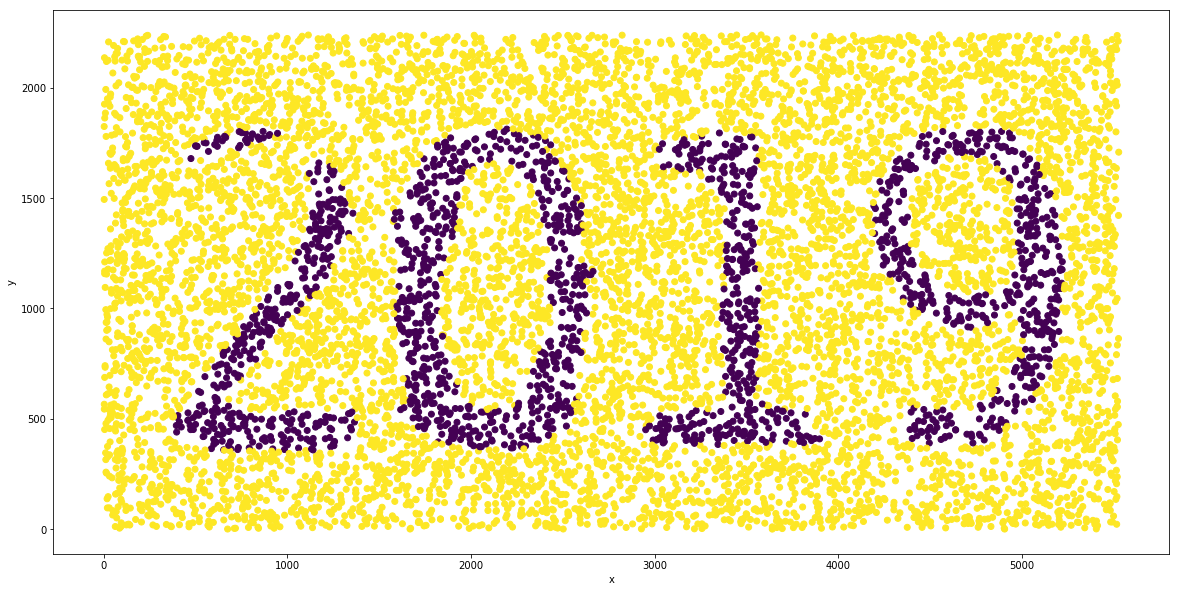

In [199]:
# plot hasil
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
plt.scatter(temp[0],temp[1], c=temp_z)
plt.xlabel("x")
plt.ylabel("y")

In [214]:
# buat dataframe
result = testing
result['z'] = temp_z
result['z'] = result['z'].astype(int)
result.head()

,x,y,z
0,116.719304,1580.905084,1
1,5053.130893,727.388601,0
2,1943.101591,406.083902,0
3,4825.519309,771.889965,1
4,557.798150,2213.179651,1


In [215]:
# export csv
result.to_csv('18216002_hasil.csv', header=None, index=True)